In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
prices = pd.read_csv("../data/prices.csv")
capacity = pd.read_csv("../data/Monthly_Generating_Capacity_EIA_allSources-Copy1.csv")
ucap = pd.read_csv("../data/Monthly_UCAP_Requirements-Copy1.csv")

prices['Date'] = pd.to_datetime(prices['Date'], format='%b-%y')
capacity['Date'] = pd.to_datetime(capacity['Date'])
ucap['Date'] = pd.to_datetime(ucap['Date'])

In [10]:
capacity_dev = pd.read_csv("../data/capacity_development.csv",sep=';')

In [17]:
prices.head()

,Date,NYCA,GHIJ,NYC,LI
0,2023-05-01,4.90,5.24,17.75,7.05
1,2023-04-01,1.00,1.10,1.10,1.65
2,2023-03-01,2.17,2.17,2.17,2.17
3,2023-02-01,4.00,4.00,4.00,4.00
4,2023-01-01,2.69,2.69,2.69,2.87


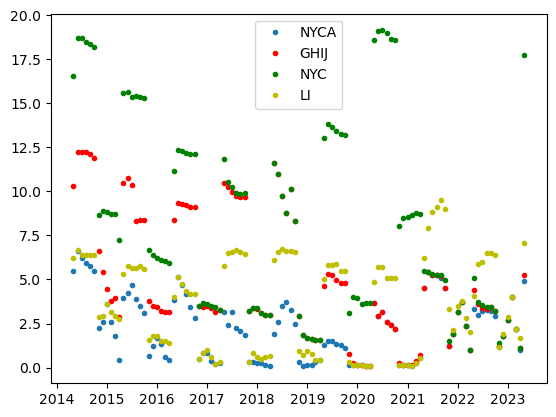

In [18]:
plt.plot(prices['Date'],prices['NYCA'],'.',label='NYCA')
plt.plot(prices['Date'],prices['GHIJ'],'r.',label='GHIJ')
plt.plot(prices['Date'],prices['NYC'],'g.',label='NYC')
plt.plot(prices['Date'],prices['LI'],'y.',label='LI')
plt.legend()

In [19]:
capacity.head()

,Date,Capacity Gas (MW),Capacity Coal (MW),Capacity Oil (MW),Capacity Renewables (MW),Capacity Others (MW)
0,2017-01-01,24444.9,1206.5,3832.8,8376.9,5728.1
1,2017-02-01,24265.9,1318.5,3700.0,8387.3,5728.1
2,2017-03-01,24379.7,1110.5,3700.0,8387.3,5728.1
3,2017-04-01,24387.4,1110.5,3710.7,8393.1,5728.1
4,2017-05-01,24409.0,1110.5,3689.1,8395.1,5728.1


In [20]:
capacity.columns = [x.replace("Capacity ", "") for x in capacity.columns.to_list()]
capacity.columns = [x.replace(" (MW)", "") for x in capacity.columns.to_list()]
capacity['Sum'] = capacity.sum(axis=1)
capacity.head()

C:\Users\hantk\AppData\Local\Temp\ipykernel_15420\3077809390.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  capacity['Sum'] = capacity.sum(axis=1)


,Date,Gas,Coal,Oil,Renewables,Others,Sum
0,2017-01-01,24444.9,1206.5,3832.8,8376.9,5728.1,43589.2
1,2017-02-01,24265.9,1318.5,3700.0,8387.3,5728.1,43399.8
2,2017-03-01,24379.7,1110.5,3700.0,8387.3,5728.1,43305.6
3,2017-04-01,24387.4,1110.5,3710.7,8393.1,5728.1,43329.8
4,2017-05-01,24409.0,1110.5,3689.1,8395.1,5728.1,43331.8


In [11]:
capacity_dev.head()

,Date,gas,coal,oil
0,Jan 17,0.0,0.0,0.0
1,Feb 17,-179.0,112.0,-132.8
2,Mar-17,-65.2,-96.0,-132.8
3,Apr 17,-57.5,-96.0,-122.1
4,May-17,-35.9,-96.0,-143.7


In [21]:
df = prices.set_index("Date").join(capacity.set_index("Date"))
df = df.dropna()

In [22]:
df.head()

,NYCA,GHIJ,NYC,LI,Gas,Coal,Oil,Renewables,Others,Sum
Date,,,,,,,,,,
2023-03-01,2.17,2.17,2.17,2.17,26295.0,0.0,3808.8,10038.4,3555.4,43697.6
2023-02-01,4.00,4.00,4.00,4.00,26285.0,0.0,3808.6,9931.4,3545.4,43570.4
2023-01-01,2.69,2.69,2.69,2.87,26330.2,0.0,3809.0,9692.4,3545.4,43377.0
2022-12-01,1.80,1.80,1.80,1.88,26325.0,0.0,3808.4,9543.4,3535.4,43212.2
2022-11-01,1.15,1.22,1.39,1.19,26325.0,0.0,3808.4,9513.4,3535.4,43182.2


In [27]:
df2 = df.join(ucap.set_index("Date"))
df2 = df2.dropna()
df2.rename(columns={'UCAP Requirements (MW)':'UCAP'}, inplace=True)

In [28]:
df2.head()

,NYCA,GHIJ,NYC,LI,Gas,Coal,Oil,Renewables,Others,Sum,UCAP
Date,,,,,,,,,,,
2023-03-01,2.17,2.17,2.17,2.17,26295.0,0.0,3808.8,10038.4,3555.4,43697.6,34607.8
2023-02-01,4.00,4.00,4.00,4.00,26285.0,0.0,3808.6,9931.4,3545.4,43570.4,34607.8
2023-01-01,2.69,2.69,2.69,2.87,26330.2,0.0,3809.0,9692.4,3545.4,43377.0,34607.8
2022-12-01,1.80,1.80,1.80,1.88,26325.0,0.0,3808.4,9543.4,3535.4,43212.2,34607.8
2022-11-01,1.15,1.22,1.39,1.19,26325.0,0.0,3808.4,9513.4,3535.4,43182.2,34607.8


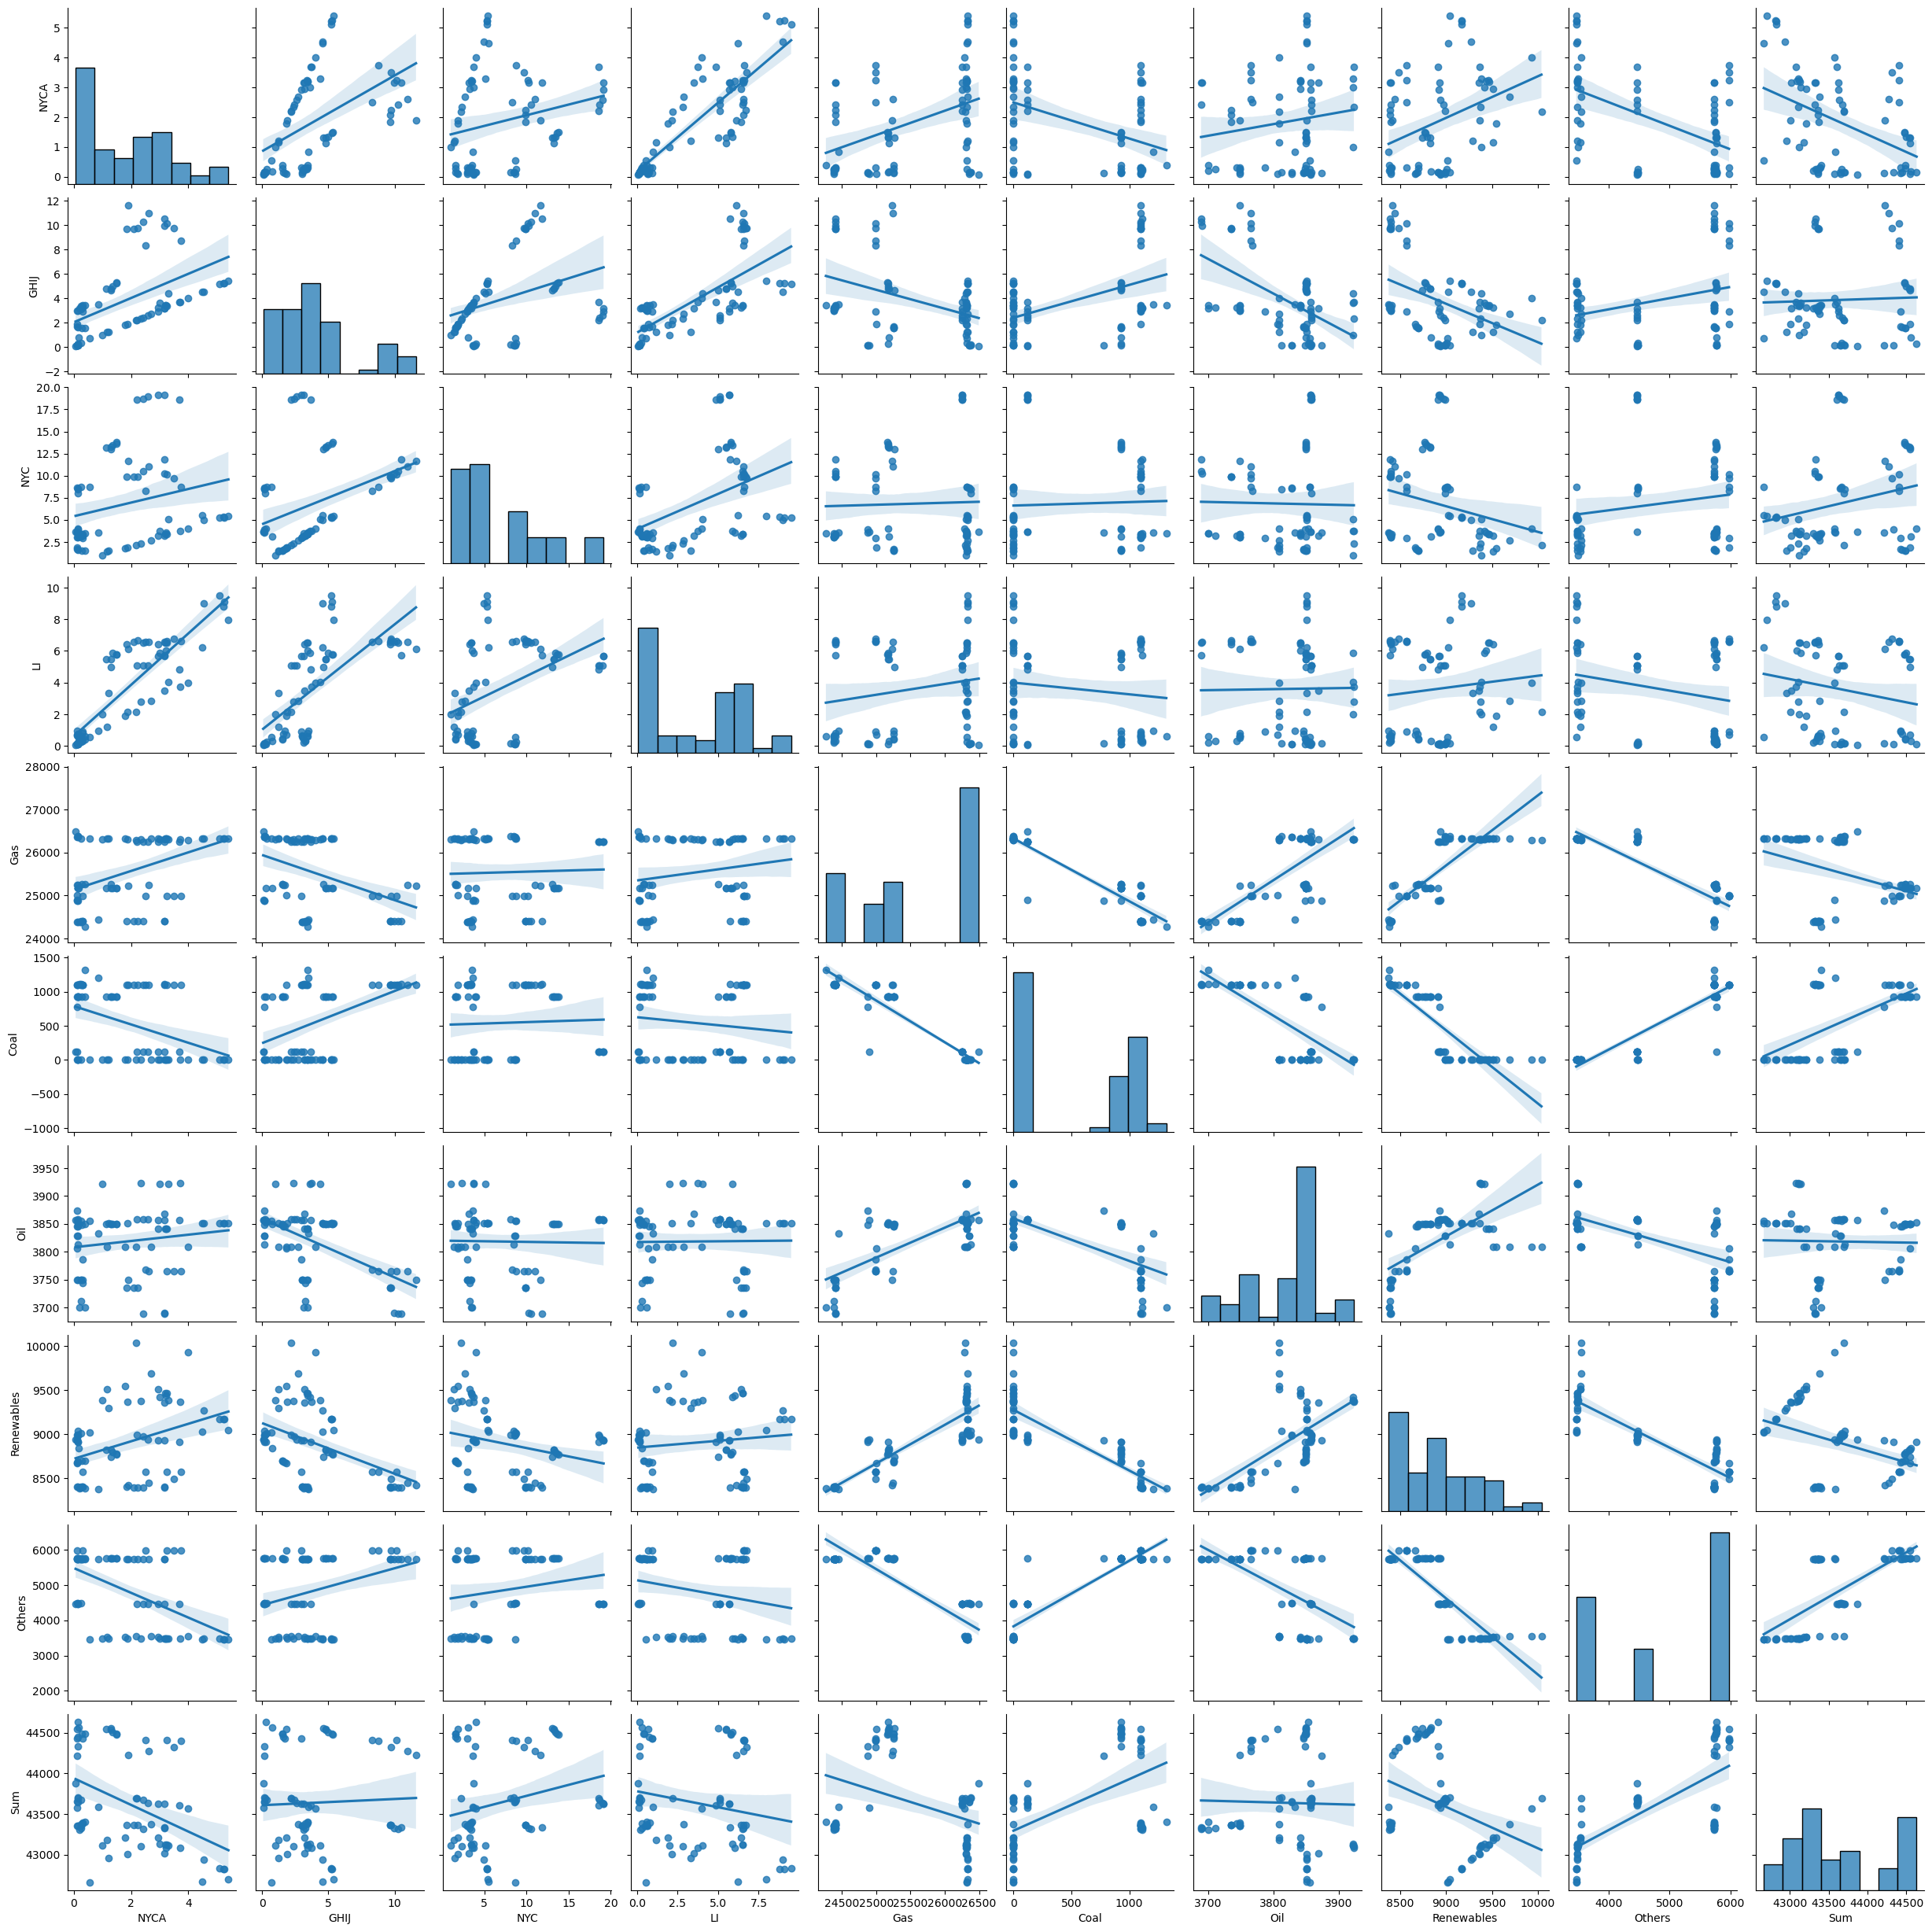

In [29]:
sns.pairplot(df, kind='reg')

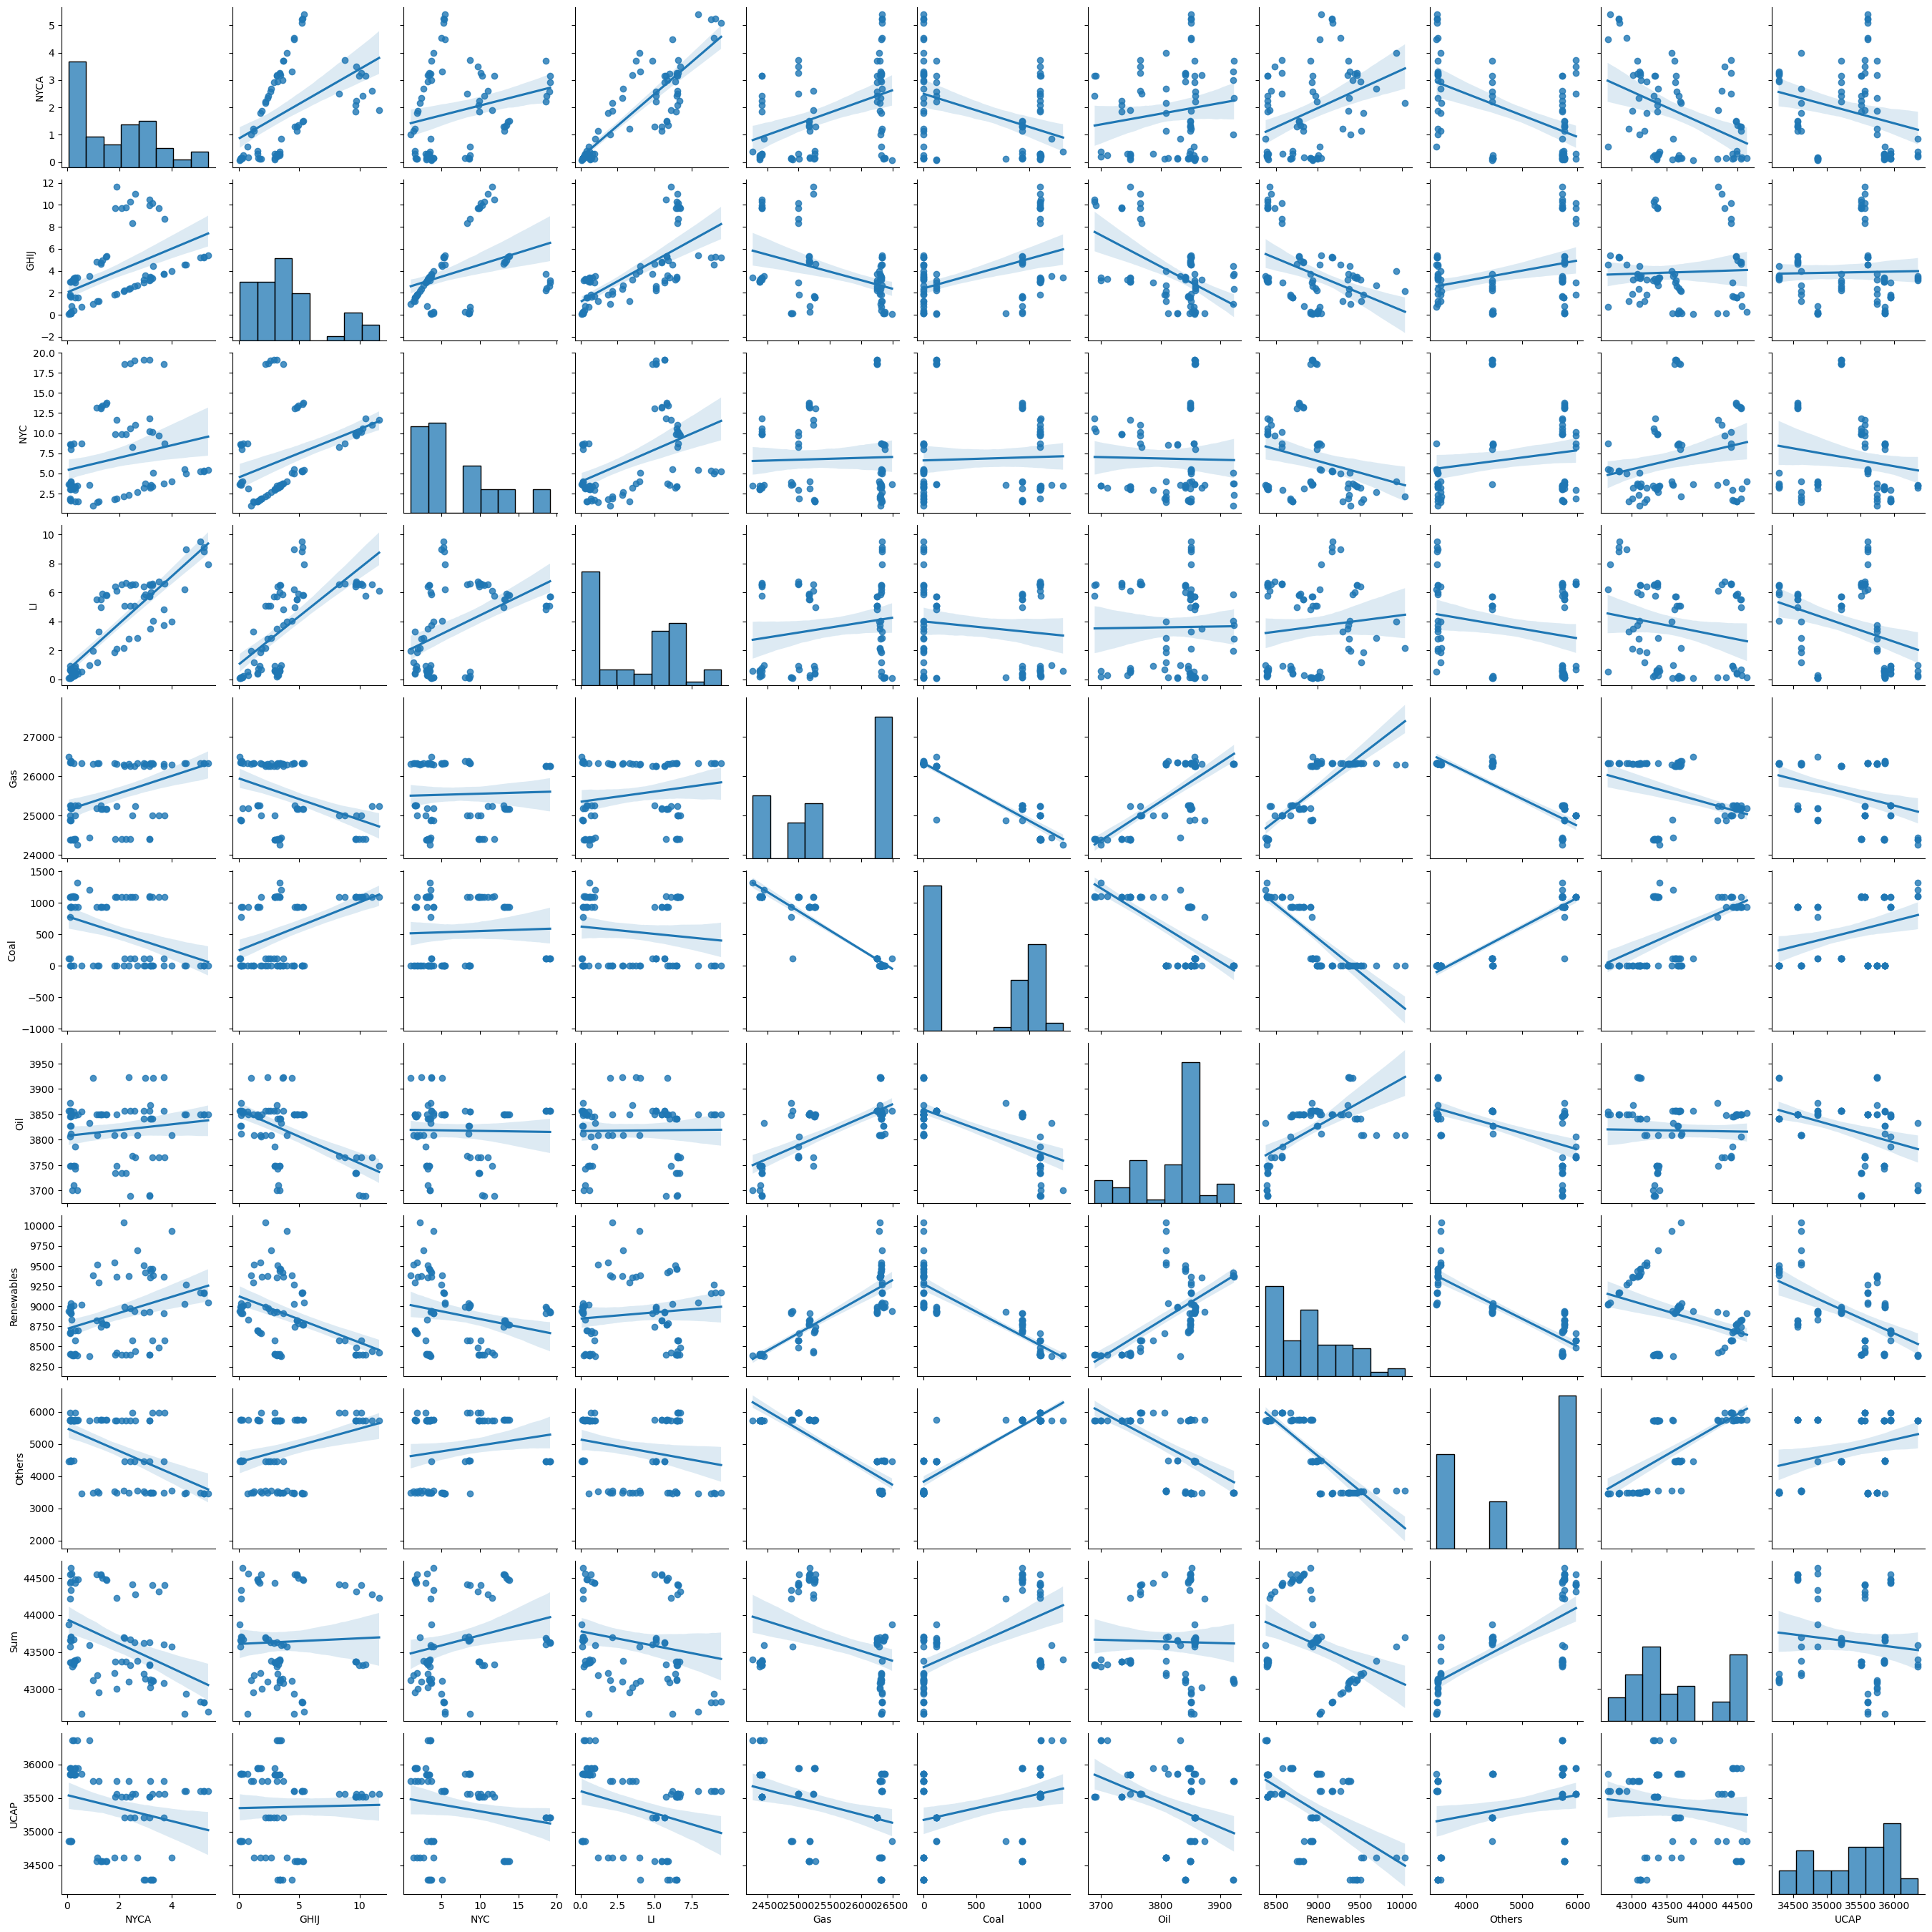

In [30]:
sns.pairplot(df2, kind='reg')